# Cifar-100 이미지 분류 - ver.2
- Cifar-100용 별도의 모델
- 32/64/128 Conv2D node 수
- Adam() optimizer 사용

In [1]:
import numpy as np 
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

- 상수 설정

In [2]:
BATCH_SIZE = 32
NUM_CLASSES = 100
EPOCHS = 100
MODEL_PATH = 'model/best_cifar-100.h5'

In [3]:
CIFAR100_LABELS = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

### 데이터 전처리

In [4]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [5]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

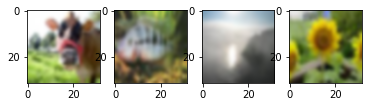

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation='bicubic')
plt.subplot(142)
plt.imshow(X_train[4], interpolation='bicubic')
plt.subplot(143)
plt.imshow(X_train[8], interpolation='bicubic')
plt.subplot(144)
plt.imshow(X_train[12], interpolation='bicubic')
plt.show()

In [7]:
CIFAR100_LABELS[y_train[0][0]], CIFAR100_LABELS[y_train[4][0]], \
    CIFAR100_LABELS[y_train[8][0]], CIFAR100_LABELS[y_train[12][0]]

('cattle', 'aquarium_fish', 'cloud', 'sunflower')

In [8]:
# 0~1 사이로 정규화
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
Y_train.shape, Y_test.shape

((50000, 100), (10000, 100))

### 모델 정의/설정/학습/평가

In [10]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
model = Sequential([ 
    Conv2D(32, (3,3), padding='same', input_shape=(32,32,3)),
    Activation('relu'),
    MaxPooling2D(),
    Activation('relu'),

    Conv2D(64, (3,3)),
    Activation('relu'),
    MaxPooling2D(),
    Activation('relu'),
    Dropout(0.1),

    Conv2D(128, (3,3), padding='same'),
    Activation('relu'),
    MaxPooling2D(),
    Activation('relu'),
    Dropout(0.25), 

    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')        
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [12]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
import os
if not os.path.exists('model'):
    os.mkdir('model')
checkpointer = ModelCheckpoint(
    MODEL_PATH, verbose=1, save_best_only=True
)
early_stopping = EarlyStopping(patience=10)

In [14]:
history = model.fit(
    X_train, Y_train, validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[checkpointer, early_stopping]
)

Epoch 1/100
1250/1250 [==============================] - 37s 4ms/step - loss: 4.3840 - accuracy: 0.0351 - val_loss: 4.0773 - val_accuracy: 0.0929

Epoch 00001: val_loss improved from inf to 4.07732, saving model to best_cifar-100.h5
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 3.9755 - accuracy: 0.0950 - val_loss: 3.7229 - val_accuracy: 0.1457

Epoch 00002: val_loss improved from 4.07732 to 3.72291, saving model to best_cifar-100.h5
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 3.7268 - accuracy: 0.1320 - val_loss: 3.5086 - val_accuracy: 0.1828

Epoch 00003: val_loss improved from 3.72291 to 3.50864, saving model to best_cifar-100.h5
Epoch 4/100
1250/1250 [==============================] - 6s 5ms/step - loss: 3.5573 - accuracy: 0.1585 - val_loss: 3.3476 - val_accuracy: 0.2124

Epoch 00004: val_loss improved from 3.50864 to 3.34759, saving model to best_cifar-100.h5
Epoch 5/100
1250/1250 [==============================] - 5s

In [15]:
best_model = load_model(MODEL_PATH)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.0398 - accuracy: 0.4727


[2.0398380756378174, 0.47269999980926514]